### Flight fare Analysis and prediction

In [1]:
# Importing all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import the data

train_data = pd.read_excel('Data_Train.xlsx')

In [3]:
# View the data

train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# Checking the structure / size of the data

train_data.shape

(10683, 11)

### Handling missing data values

In [5]:
# Checking for missing values to ensure data integrity

train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are only two missing values in the large amount of dataset, so it's okay to drop those missing values


In [6]:
# Drop the missing values

train_data.dropna(inplace = True)

In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

No more missing values

### Data cleaning / Data Preprocessing

It's important to understand the data, the use-case and deep analysis needs to be performed, and that cannot be accomplished with a 'dirty' data

In [8]:
# Checking the data types

train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

By default most of the observations are of object types, but columns 'Destination', 'Dep_Time', 'Arrival_Time' are timestamps and should be in datetime formats

In [9]:
# To convert the timestamp columns to datetime format, i'll create a function

def convert_to_datetime(col):
    train_data[col] = pd.to_datetime(train_data[col])

In [10]:
# Viewing the columns in the datasets

train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
# Create a loop that iterates a list of the desired columns to be converted

for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    convert_to_datetime(i)

In [12]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

Conversion successful!

To make analysis easier for the datetime column (Date_of_Journey), we split the full date into different parts of day and month

In [13]:
train_data['Journey_day'] = train_data['Date_of_Journey'].dt.day
train_data['Journey_month'] = train_data['Date_of_Journey'].dt.month

In [14]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-02-13 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-02-13 05:50:00,2022-02-13 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-02-13 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-02-13 18:05:00,2022-02-13 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-02-13 16:50:00,2022-02-13 21:35:00,4h 45m,1 stop,No info,13302,3,1


Now i'll drop the 'Date_of_journey' column since i've already extracted all the necessary features

In [15]:
train_data.drop('Date_of_Journey', axis = 1, inplace = True)

While in the 'Dep_Time' and 'Arrival_Time' columns, i'm going to extract the different parts of the timestamp by creating a function or just creating new columns directly

In [16]:
# First method --> Creating different extraction functions

def extract_hour(df, col):
    df[col + '_hour'] = df[col].dt.hour

def extract_min(df, col):
    df[col + '_minute'] = df[col].dt.minute

def drop_column(df, col):
    df.drop(col, axis = 1, inplace = True)
    

In [17]:
# And calling those functions on the dataframe

extract_hour(train_data, 'Dep_Time')
extract_min(train_data, 'Dep_Time')
drop_column(train_data, 'Dep_Time')


extract_hour(train_data, 'Arrival_Time')
extract_min(train_data, 'Arrival_Time')
drop_column(train_data, 'Arrival_Time')

In [18]:
# Second method --> directly creating new columns and performing the extractions

# train_data['Dep_Time_hour'] = train_data['Dep_Time'].dt.hour
# train_data['Dep_Time_minute'] = train_data['Dep_Time'].dt.minute
# train_data.drop('Dep_Time', axis = 1, inplace = True)

# train_data['Arrival_Time_hour'] = train_data['Arrival_Time'].dt.hour
# train_data['Arrival_Time_minute'] = train_data['Arrival_Time'].dt.minute
# train_data.drop('Arrival_Time', axis = 1, inplace = True)

In [19]:
 train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


Now we pre-process the 'Duration' feature --> separate the hour part from the minute. If it only contains an hour part then append a minute part to it and vice-versa

In [20]:
# First convert the 'Duration' column to list for iteration

duration_list = list(train_data['Duration'])

In [21]:
# For the following step all we're doing is checking if the duration has two parts, if it doesn't then we append the
# appropriate one

for i in range(len(duration_list)):
    if len(duration_list[i].split(' ')) == 2:
        pass
    else:
        if 'h' in duration_list[i]:
            duration_list[i] = duration_list[i] + ' 0m'
        else:
            duration_list[i] = '0h ' + duration_list[i]

In [22]:
# After assigning saving the new processed list, we replace it in the original dataset column

train_data['Duration'] = duration_list

In [23]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [24]:
# For the next step to separate the hour from the minute we create 2 functions

def hour(x):
    return x.split(' ')[0][0:-1]

def minute(x):
    return x.split(' ')[1][0:-1]

In [25]:
train_data['Duration_hours'] = train_data['Duration'].apply(hour)
train_data['Duration_minutes'] = train_data['Duration'].apply(minute)
drop_column(train_data, 'Duration')

In [26]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [27]:
# Checking the data types for each feature again

train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_minutes       object
dtype: object

Notice 'Duration_hours' and 'Duration_minutes' are in object formats instead of integer format so we convert them

In [28]:
train_data['Duration_hours'] = train_data['Duration_hours'].astype(int)
train_data['Duration_minutes'] = train_data['Duration_minutes'].astype(int)

In [29]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int64
Duration_minutes        int64
dtype: object

Essentially these data type conversions are done to be able to distinguish between categorical data and numerical or continous data.

We can perform a little check -->

In [30]:
# This loops through the data columns and extracts the categorical data from the numerical data

cat_col = [col for col in train_data.columns if train_data[col].dtypes == 'O'] # or object
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [31]:
# The otherwise case

cont_col = [col for col in train_data if train_data[col].dtypes != object]
cont_col

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_minutes']

### Handling categorical data / Feature encoding

There are two types of categorical data :

* Nominal data --> Data that are not in any particular order e.g Name of countries

* Ordinal data --> Data in heirarchy e.g Good, better, best


Whenever we have Nominal data we use "One-hot encoding technique"
and for ordinal data we use "LabelEncoding"

In [32]:
categorical = train_data[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [33]:
# Analysing the frequency distribution of 'Airline' column values

categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Showing the frequency distribution of these values tells so much about these airline companies but we'll compare these companies to the price columns

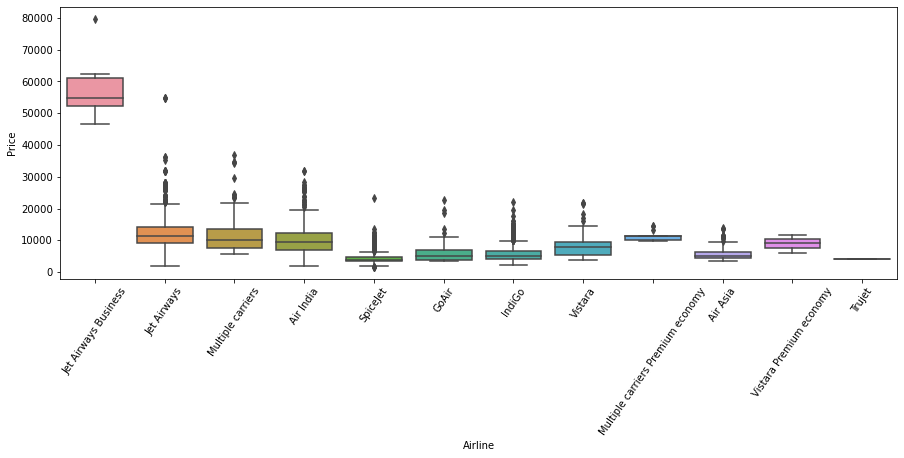

In [34]:
plt.figure(figsize = (15, 5))
plt.xticks(rotation = 55)
sns.boxplot(x = 'Airline', y = 'Price', data = train_data.sort_values('Price', ascending = False));

The above visual shows with respect to Jet Airways Business having the highest price where its median line is clearly above the rest with theirs having almost same line median

_______________________________________________________________________________________________________________

We can also compare the visauls with the 'total_stops' column

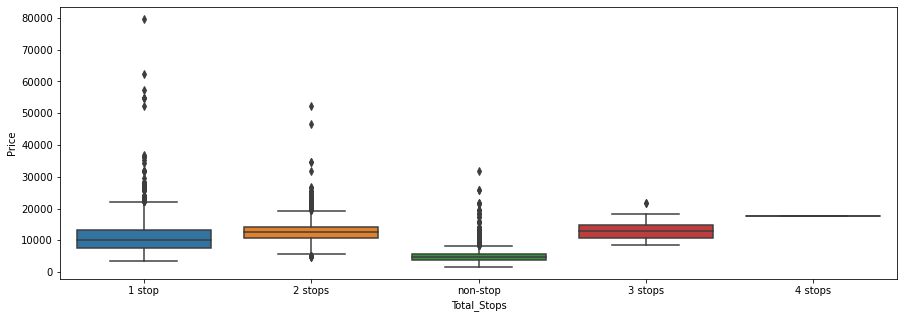

In [35]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = 'Total_Stops', y = 'Price', data = train_data.sort_values('Price', ascending = False));

So this beautiful visualization shows flights with 1 stop seem to have higher fares despite the outliers and those with max of 4 stops have a constant low fare, it does not flunctuate very much.

______________________________________________________________________________________________________________

Since it's a Nominal categorical data, we'll use One-hot encoding technique to encode the values (using pandas get_dummies)

In [36]:
Airlines = pd.get_dummies(categorical['Airline'], drop_first = True)
Airlines.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [37]:
# Next we analyse the 'Source' column and dummify it

categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

It shows Delhi having the highest value distribution with chennai having the lowest

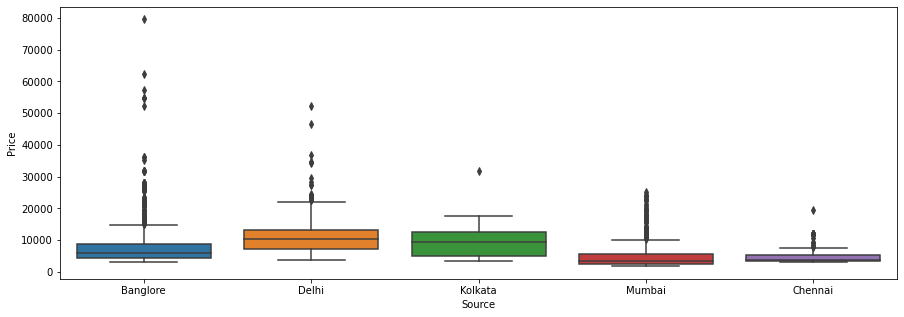

In [38]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = 'Source', y = 'Price', data = train_data.sort_values('Price', ascending = False));

Banglore having the highest fare with respect to price and Chennai having the lowest

In [39]:
Source = pd.get_dummies(categorical['Source'], drop_first = True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [40]:
# Next analyse and dummify the 'Destination' column

categorical.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

It shows Cochin having the highest value distribution and Kolkata having the lowest

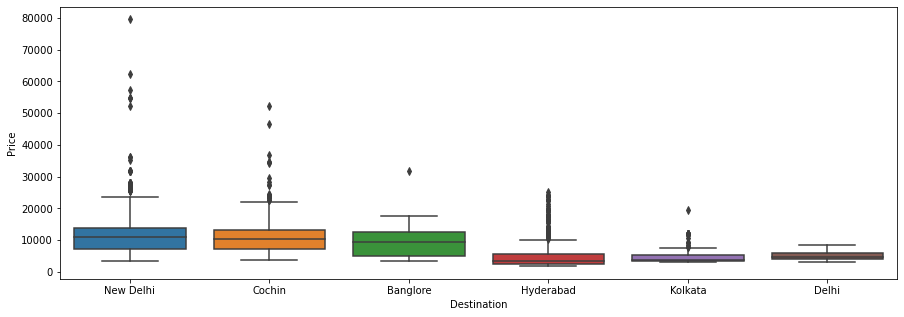

In [41]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'Destination', y = 'Price', data = train_data.sort_values('Price', ascending = False));

New Delhi having the highest fare while Kolkata having the lowest (Because Delhi and New Delhi are basically the same places...?)

In [42]:
Destination = pd.get_dummies(categorical['Destination'], drop_first = True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [43]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


For the Route column, the routes are separated by the arrow sign separator. Machine learning does not accept string values so we'll have to encode them into numerical values i.e assigning each route to a specific number e.g route 1, route 2, route 3,..... route n.

In [44]:
categorical['Route'].head()

0                BLR → DEL
1    CCU → IXR → BBI → BLR
2    DEL → LKO → BOM → COK
3          CCU → NAG → BLR
4          BLR → NAG → DEL
Name: Route, dtype: object

In [45]:
# Using the .str() method to first convert the object values into str to enable us use the split() method

categorical['Route'].str.split('→').head()

0                  [BLR ,  DEL]
1    [CCU ,  IXR ,  BBI ,  BLR]
2    [DEL ,  LKO ,  BOM ,  COK]
3           [CCU ,  NAG ,  BLR]
4           [BLR ,  NAG ,  DEL]
Name: Route, dtype: object

With the returned lists above, we then index each list with the first elements being routes_1, second being routes_2 and so on... uptil route 5 since we have 5 routes

In [46]:
categorical['Route_1'] = categorical['Route'].str.split('→').str[0]
categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
categorical['Route_3'] = categorical['Route'].str.split('→').str[2]
categorical['Route_4'] = categorical['Route'].str.split('→').str[3]
categorical['Route_5'] = categorical['Route'].str.split('→').str[4]

/tmp/ipykernel_22384/2948590345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_1'] = categorical['Route'].str.split('→').str[0]
/tmp/ipykernel_22384/2948590345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
/tmp/ipykernel_22384/2948590345.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [47]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [48]:
# Dropping the Route column since we've picked the necessary items

drop_column(categorical, 'Route')

/home/spades/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
# From the new dataset there are obvious missing data, so let's check their sum

categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [50]:
# We'll replace each missing value (NaN) with a string 'None'

for i in ['Route_3', 'Route_4', 'Route_5']:
    categorical[i].fillna('None', inplace = True)

/home/spades/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [51]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

No more missing data

Next to count the number of categorical data for each feature



In [52]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i, len(categorical[i].unique())))  # use unique() or value_counts()

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


These are the total number of unique categorical values for each feature

The different Routes have different lengths of unique variables, Routes 2,3,4 have a higher number of values so applying one-hot encoding on them might cause a problem for the algorithm by creating more number of columns i.e the data becomes huge. To get rid of this high DIMENSIONALITY issue we'll use label encoder

In [53]:
# Importing the label encoder class

from sklearn.preprocessing import LabelEncoder

In [54]:
# Create an object of the class to work with

encoder = LabelEncoder()

In [55]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [56]:
# Loop through the features, encode them and update the dataset

for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i] = encoder.fit_transform(categorical[i])

/tmp/ipykernel_22384/3307170746.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i] = encoder.fit_transform(categorical[i])


In [57]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


So without creating new columns like the one-hot encoding does, it just assigns each route to a unique integer

Now the 'Additional_info' column will be dropped since most of it's values contain 'No info'

In [58]:
drop_column(categorical, 'Additional_Info')

/home/spades/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Now for the 'total_stops_ feature

In [59]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

For this part we'll replace each with an integer non-stop for 0, 1 stop for 1 e.t.c..

In [60]:
dict = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [61]:
categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)

/tmp/ipykernel_22384/4198516256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)


In [62]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


After that we'll concatenate all the slices of dataframes we earlier created into 1 single dataframe

In [63]:
data_train = pd.concat([categorical,Airlines, Source, Destination, train_data[cont_col]], axis = 1)

In [64]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302,3,1,16,50,21,35,4,45


In [65]:
# we drop the Airline, Source and Destination categorical columns since we've extracted the needed values

for i in ['Airline', 'Source', 'Destination']:
    drop_column(data_train, i)

In [66]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


In [67]:
# To view all the cut out columns of the dataset we'll extend the max number of dispayed columns by pandas

pd.set_option('display.max_columns',35)
# It helps to display all the truncated columns

data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


### Handling Outliers, Separating independent features from dependent features

Outliers are nothing but basically extreme case values might cause skewness in the distribution of a numeric feature.

So naturally we'll check for outliers in our numerical column which in this case is the price column. But firstly we'll create a visualization of the dataset to view the distribution of the outlier and make decisions

In [68]:
# Creating a function that plots charts

def plot(df, col):
    fig, (ax1, ax2) = plt.subplots(2,1)
    sns.distplot(df[col], ax = ax1)
    sns.boxplot(df[col], ax = ax2)

/home/spades/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/spades/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


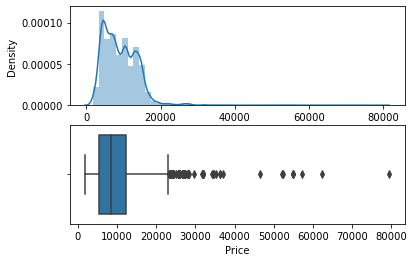

In [69]:
plot(data_train, 'Price')

In the first distribution we notice some outliers because it is a positively skewed distribution, while in the second plot we notice how some data points spread across to the right hand side and thus are our outliers.

So let's say after having a conversion with the domain expertese and they say what ever is greater than 40K is an outlier. So we'll just replace them with the median because median plays a very handy role in handling outliers

In [70]:
# Using a numpy method to easily replace the outlier values given the conditions

data_train['Price'] = np.where(data_train['Price'] >= 40000, data_train['Price'].median(), data_train['Price'])

/home/spades/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/spades/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


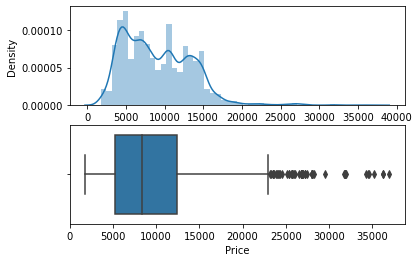

In [71]:
plot(data_train, 'Price')

From the new plot it shows how the data points have adjusted even though there are still some outliers it's okay

#### Separating independent features from dependent feature

In [72]:
# For dependent variable

X = data_train.drop('Price', axis = 1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [73]:
y = data_train['Price']
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

### Select best features using feature selection technique

* Feature selection is selecting the best feature that contributes most and has a good relationship with the target variable.

* Why? To select important features so that we don't have issues of multiple dimensions so we don't have issues of multiple dimensions / columns

In [74]:
# Importing a class that helps you estimate the features with respect to the target variable

from sklearn.feature_selection import mutual_info_classif

In [75]:
# Passing the independet and target variables

mic = mutual_info_classif(X, y)

In [76]:
mic

array([2.14944934, 2.03745041, 2.78610537, 2.27183366, 1.45823252,
       0.75132208, 0.77129806, 0.08834164, 0.65891313, 0.92529226,
       0.00630986, 0.55929971, 0.01606659, 0.33703776, 0.003877  ,
       0.19730294, 0.00481101, 0.15373294, 1.5476563 , 0.88753455,
       0.30051636, 1.54642506, 0.41317991, 0.30719058, 0.17642349,
       0.37879848, 1.0891288 , 0.83106415, 1.45766634, 1.20219667,
       1.81804522, 1.56901882, 1.78007315, 1.06594206])

What the above result shows is the importance of each column in the dataset with respect to the target variable, but let's align them in a dataframe

In [77]:
imp = pd.DataFrame(mic, index = X.columns)
imp

,0
Total_Stops,2.149449
Route_1,2.037450
Route_2,2.786105
Route_3,2.271834
Route_4,1.458233
Route_5,0.751322
Air India,0.771298
GoAir,0.088342
IndiGo,0.658913
Jet Airways,0.925292


In [78]:
# rename the column and sort based on the importance

imp.columns = ['importance']
imp.sort_values(by = 'importance', ascending = False)

,importance
Route_2,2.786105
Route_3,2.271834
Total_Stops,2.149449
Route_1,2.037450
Arrival_Time_hour,1.818045
Duration_hours,1.780073
Arrival_Time_minute,1.569019
Delhi,1.547656
Cochin,1.546425
Route_4,1.458233


So from the above dataframe it translates that the first 3/4 columns will contribute most to the target variable while the last 2 columns will contribute least, Possibly we can skip the columns if we wish after having conversations with the domain experteese

# Machine Learning Models

Random Forest => Used for Classification problems and also regression problems. It follows ensemble learning approach.

* Ensemble learning approach --> is all about learning from multiple models and eventually combines all the learnings. It's a collection of multiple decision trees.

* Decision Tree is a model used for classification problems and also regression problems. It's a heirarcical structure based on conditions. A decision tree works with having a parent node and other subsequent leaf nodes. But how do we select the parent node..? By the following steps;



* Entropy & information gain --> Is the probability of having randomness in your data. It will probably give impurity present inside the data. Formula -Pi log Pi. It is the probability of occurance of a data in a certain space. Gives impurity in data.

    - Information gain just tells which feature after the entropy operation will give the highest information gain. Whatsoever feature with the higest information gain becomes the parent node. 
    

## Apply Machine Learning on the data & Automate the prediction

In [79]:
# Split the dataset into train and test

from sklearn.model_selection import train_test_split

In [80]:
# Using a test size of 20%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

We'll also use the metrics library to work with some accuracy metrics from sklearn;

* r2_score() metrics
* Mean Absolute Error (MAE)
* Mean Square Error (MSE)
* Root Mean Square Error (RMSE)


* r2 score is the proportion of variance in the dependent variable that is predicted from the independent variable (s). Another definition is total variance, the score varies from 0 to 100% so if it is 100%, the two variables are perfectly correlated i.e no variance at all. Or in other words, how well the regression model fits the observed data.


* MSE is the average of the square of the errors. The larger the number the larger the error. Error in this case means the difference between the observed values and the predicted values. They are squared to get rid of the negative values. THERE IS NO CORRECT VALUE FOR MSE. Simply put, the lower the value the better and 0 means the model is perfect. Since there is no correct answer, the MSE's basic value is in selecting one prediction model over another.


* MAE measures the average magnitude of the errors in a set of forecasts without considering their direction. It measures accuracy for continous variables. The MAE is a linear score which means that all the individual differences are weighted equally in the average.


* RMSE is a quadratic scoring rule which measures the average magnitude of the error. RMSE is most useful when large errors are particularly undesirable.

**The MAE and the RMSE can be used together to diagnose the variation in the errors in a set of forecasts. The RMSE will always be larger or equal to the MAE; the greater difference between them, the greater the variance in the individual errors in the sample. If the RMSE == MAE, then all the errors are of the same magnitude**

In [81]:
from sklearn import metrics

In [82]:
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    print('Predicitons are :\n {}'.format(y_prediction))
    print('\n')
    
    r2_score = metrics.r2_score(y_test, y_prediction)
    print('r2 score is : {}'.format(r2_score))
    
    print('MAE : ',metrics.mean_absolute_error(y_test, y_prediction))
    print('MSE : ',metrics.mean_squared_error(y_test, y_prediction))
    print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))
    
    sns.distplot(y_test - y_prediction)

## Random Forest

In [83]:
from sklearn.ensemble import RandomForestRegressor

Training score : 0.9537046022143095
Predicitons are :
 [12969.465  6634.99   7831.195 ...  7716.3    2227.    11205.35 ]


r2 score is : 0.8256265836406227
MAE :  1138.2882593371376
MSE :  3379677.9491735566
RMSE :  1838.3900427204117


/home/spades/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


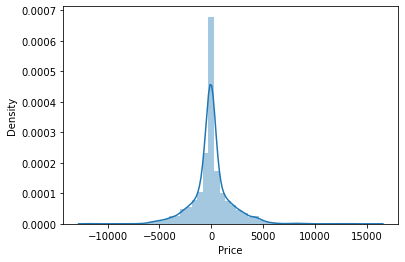

In [84]:
predict(RandomForestRegressor())

* The training score is about 94% accuracy.
* It's r2 score is about 82% which is a good correlation with little variance.
* The MSE is relatively okay but it's value will be known when compared with other models.
* The MAE and RMSE have no great difference between them which means the data is also of low variance.


* From the distribution plot it seems most of the predictions are all at 0, meaning less error. The model is very good because there is a peak at 0, little or no error.


In conclusion, the model has a good metrics!

# Decision Tree

Is a machine learning algorithm used for classification or regression problems. It is a base algorithm used in every ensemble technique like Random Forest, XGBoost (which are combination of multiple decision trees).


<u>Pre-prunning and Post prunning</u>
* Overfitting --> When you have high accuracy score in training set but then low accuracy score in test set. So to solve these problems we use pre-prunning and post prunning.

    - Post-Prunning (backward prunnning) --> Decision tree is generated first, then the post prunning removes somes useless branches of the DT by experimenting some cross validation approaches like Random search CV, or minimized search CV like grid-search CV or Optuna Algorithm and at the end it improves the accuracy of the DT.
    
    - Pre- Prunning (forward prunning) --> It also controls the height of a decision tree. First by building the DT then removing some useless branches but in pre-prunning before building the DT we will control the stack branches using CVs (Random / Grid search) to find the best parameters and the best model. After getting the best model (DT) we will do training on the data and then testing.
    
    
### Pros and Cons of Decision Tree

#### Different algorithms for decision tree;
    * ID 3 (Iterative Dictamizer) --> algorithm to construct a dt basically for classification use case. Highly used alg. It uses information gain as a criteria to build dt. It always works in terms of categorical attributes
        
        from sklearn.tree import DecisionTreeClassifier()
        
    * C 4.5 --> Used for cont. and discrete data, it's an extension of ID3 (much better than ID3), it deals with numerical data or categorical data. Uses Gini index / impurity to select parent node.
    
    * CART (Classification And Regression Trees) --> Used in both class. and regression use case, it's highly used. uses Gini index to select root node but can be modified to use entropy.
    
    * C 5.0 --> better than C 4.5. works with categorical target variable (Yes or No).
    
    * Decision stump --> Used for single branch splits
    
    * M5 --> Used when there is too much noise, outliers in the data for small dataset.
    
    * CIT (Condition Inference Tree) 
    
#### PROS
- Used in both regression and classification problems.
- Very easy to learn
- Dont have to deal with outliers
- No need to perform Scaling and Normalization. Entirely works based on decisions/conditions.

#### CONS
- Small change in training data will cause distability, it will shift the nodes.
- Problem of overfitting is high
- Takes more time to train a decision tree model than other classification alg. due to lots of splitting and calcs.

## Decision Tree (Regression)

- Gradient Descent approach is used to minimize errors for linear regression i.e sum of square errors. The minimum SSE we have the better the algorithm.


## Linear Regression

* y = mx + c
    - y = dependent feature
    - m = slope. m = y ratio x (y:x, y/x i.e rate of change with respect to x (dy/dx))
    - x = data point or independent feature
    - c = constant. c = 0 only if the best fit line is passing from the origin. so eqn = y = mx
    
    
* Works on the basis of best fit line. But how we find the best fit line? A random line is drawn across the datapoints and then the errors are calculated from each point to the line drawn. Select the points with least error. = sum(actual value - predicted value)^2 all the summation for the particual drawn line. The MSE is then calculated for each of these lines, each MSE has a slope and a constant, the MSE with least error is the chosen best regression line.


But in scenarios where there are probably thousands of lines, it makes no sense to compute the MSE for each of these lines. So there's a more advanced aproach called the gradient descent a 3-Dimensional approach.

## K-Nearest Neighbor (KNN) Algorithm - Supervised Learning

It is used in both classification use-cases and regression use-cases.

-Limitation => Never use KNN if the data is huge because it takes lots of time, computation wise it is costly whenever u have data is GBs(Gigabytes) or TBs(Tetabytes) or PBs (Perabytes).

K is nothing but number of nearest neighbors to that particular datapoint. But how do we calculate the K? By the use of Cross Validation approach which has Randomized search CV or Grid search CV by putting random values of K = [2,3,....10].

For example of a test data / unseen data, we calculate its distance from each k point. 
dist = sqrt((x2 - x1)^2 + (y2 - y1)^2) for 2 dimension plane.

But lets assume the data is in 3D plane i.e (x1,y1,z1) (x2,y2,z2) or n-dimension we also use:
dist = sqrt((x2 - x1)^2 + (y2 - y1)^2) + (z2 - z1)^2.......(n2 - n1)^2). It's called Eucleadean distance, that's what KNN uses.

But in scenarios where the distance between x and y isnt a straight line, we use what's called "Manhattan distance". i.e summation of all the vectors.

* KNN is highly used when looking for similar items.

**Characteristics of KNN**

- It's a lazy-learner alg. => Unlike Linear alg, decision trees, logistic reg, where they all look for relationships in the data, KNN doesn't look for relationships in the data. with KNN unless u're not looking for predction, u dont have some test data or unseen data KNN will never try to learn relations from data, it will never try to build some structure from data. It only calculates the distance of whatever new data u have from existing data points, based on the distances it will give some kind of predictions.

- In KNN it's entire dataset itself is a model. so if that data is huge, the model would also be very huge and complexity will be huge, it will take more time for predictions in Big Data instances for Apache Hive, Pig or Hadoop.


### Real life use-cases

* Recommendation systems => Product recommendation system.
    -fun fact - about 35% of amazon's revenue comes from recommendations systems.

* Finding documents that have similar topics as the test document. For example findging a document on the internet that has similar topics as the one being searched for.

* Image recognition

* Video recognition

### Pros

* Used for both classification and regression (calculates the mean of each dp).
* Maths behind this algorithm is easy 
* Very easy to implement
* Doesnt take much time in training phase as it's lazy-learner

### Cons

* Not recommended when the data is huge
* Not good for high dimensional data (maybe 10-D)
* Expensive in testing phase / prediction purpose in finding the value of k.

## Trying multiple algorithms and dumping the model

A function (def predict(ml_model)) has been written to avoid recalculation of the stats for each of the models to be able to automate the modelling. Also to avoid rewriting the model over and over just do 'dumping' and save the model somewhere, so whenever there is a need for the model just load it using some fance python tools (pickle model)

In [90]:
# Dumping model
# same function as above also known as model automation
from sklearn import metrics
import pickle

def predict(ml_model, dump):
    model = ml_model.fit(X_train, y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    print('Predicitons are :\n {}'.format(y_prediction))
    print('\n')
    
    r2_score = metrics.r2_score(y_test, y_prediction)
    print('r2 score is : {}'.format(r2_score))
    
    print('MAE : ',metrics.mean_absolute_error(y_test, y_prediction))
    print('MSE : ',metrics.mean_squared_error(y_test, y_prediction))
    print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))
    
    sns.distplot(y_test - y_prediction)
    
    # to avoid dumping just any model we'll supply a condition and a 1 in the main function
    if dump == 1:
        file = open('dump/model.pkl', 'wb')
        pickle.dump(model, file)



Training score : 0.9535152639673181
Predicitons are :
 [13215.65416667  6691.47666667  7867.54       ...  7891.
  2227.         11146.4225    ]


r2 score is : 0.8282061679471129
MAE :  1130.695110425048
MSE :  3329680.854543541
RMSE :  1824.7413116777789


/home/spades/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


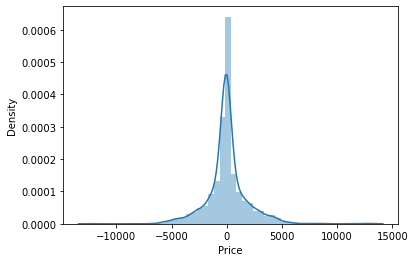

In [91]:
# test the new dump function on a model
predict(RandomForestRegressor(), 1)

In [94]:
# Trying other algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

Training score : 0.6165339093720361
Predicitons are :
 [11165.34429381  5022.59468016 13760.9555123  ...  8970.56923276
  2733.69221147 11359.34866239]


r2 score is : 0.6117331765695477
MAE :  2020.8795498096142
MSE :  7525326.101537929
RMSE :  2743.2327829657347


/home/spades/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


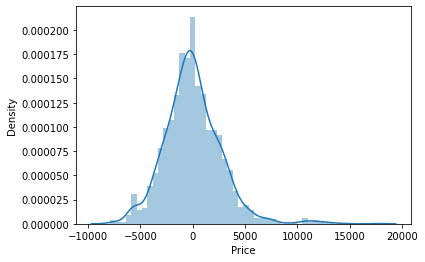

In [93]:
predict(LinearRegression(),0)

Training score : 0.9674126273332693
Predicitons are :
 [13759.  6251.  7832. ...  8891.  2227. 10697.]


r2 score is : 0.7311726529395893
MAE :  1310.7653564186553
MSE :  5210369.080126345
RMSE :  2282.623289140445


/home/spades/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


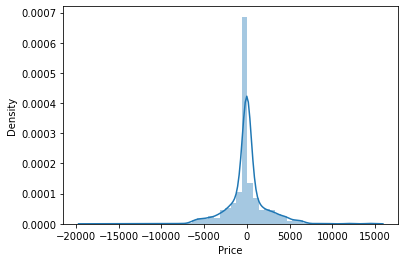

In [96]:
predict(DecisionTreeRegressor(),0)

Training score : 0.7818464781295731
Predicitons are :
 [10766.   4574.4  8608.8 ... 10041.   2332.4  8374.8]


r2 score is : 0.6236665178921788
MAE :  1789.5067852129152
MSE :  7294035.969302761
RMSE :  2700.747298305186


/home/spades/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


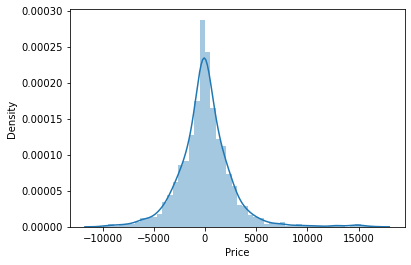

In [97]:
predict(KNeighborsRegressor(),0)

## Cross Validation

* Use-cases => Classification, regression.
* It basically finds the average accuracy in an array of different accuracy scores of a model.

### Approaches

* KFold CV
* GridSearch CV
* Randomized Search CV
* Genetic alg.
* Optima

* KFold basically splits your dataset into n number of folds for iteration and averages them out for the mean accuracy

* GridSearch CV performs some sort of permutattion and combination while Randomized Search only selects random parameters, tests them out for accuracy then stores in a list and then after a number of iters it selects the highest accuracy from that list.

* Randomized search is best used incase of optimization of computational power because grid search cv might take alot of execution time if there are lots of lists in the pre-determined parameters. while randomized search only picks random values and tests them out.

## Model parameter hypertunning

Models need to be hypertuned to be able to select the best possible parameters for a model to evaluate the model's best performance, because the default parameters have no guarantee that they're the best parameters.

In [102]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()

In [98]:
# Randomized search CV

from sklearn.model_selection import RandomizedSearchCV

In [99]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop=1200, num = 6)]
max_depth = [int(x) for x in np.linspace(start = 5, stop=30, num = 4)]

In [105]:
random_grid = {
    'n_estimators': n_estimators,
   'max_features' : ['auto', 'sqrt'],
    'max_depth' : max_depth,
    'min_samples_split' :[5,10,15,100]
}

In [106]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [107]:
rf_random = RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid, cv = 3, verbose=2, n_jobs=-1)
# verbose --> show every activity happening across the cell
#n_jobs --> it will use all the resources of the cpu

In [108]:
#fit the data

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [109]:
# checking what are the best parameters used for the CV model

rf_random.best_params_

{'n_estimators': 320,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 21}

In [111]:
# performing prediction

prediction = rf_random.predict(X_test)

/home/spades/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

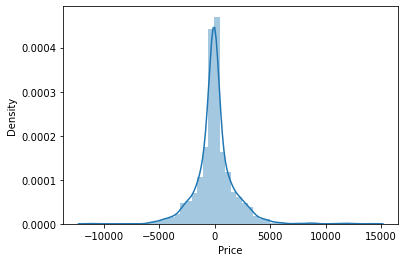

In [112]:
# check what kind of distribution gotten using this randomized search CV

sns.distplot(y_test-prediction)

In [115]:
# checking the accuracy

metrics.r2_score(y_test, prediction)

0.8500661159745353

In [117]:
# to dump/save this model

file = open('dump/rf_random.pkl', 'wb')

In [118]:
# saved into the file
pickle.dump(rf_random, file)

In [121]:
# to use the model, we have to load the model

model = open('dump/model.pkl', 'rb')
forest = pickle.load(model)

In [123]:
# to use it
 
predictions2 = forest.predict(X_test)

In [124]:
# accuracy

metrics.r2_score(y_test,predictions2)

0.8282061679471129